# 파이썬과 케라스로 배우는 강화학습

- 이웅원, 양혁렬, 김건우, 이영무, 이의령 지음


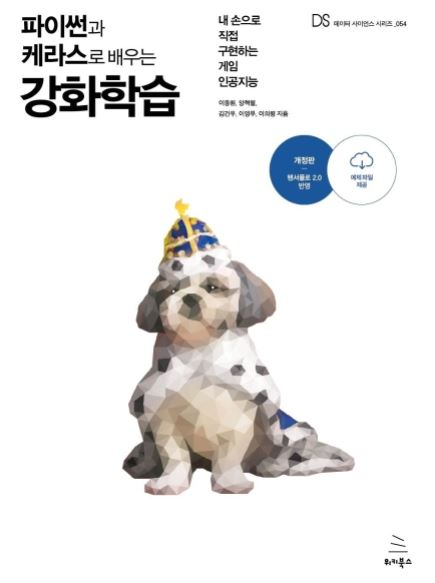

참고 링크: https://github.com/rlcode/reinforcement-learning-kr-v2

수식 마크다운 참고: https://huni0318.github.io/blog/blog-etc/2020-12-21-markdown-tutorial2/

강화학습 참고자료: 
https://sumniya.tistory.com/3

# 저번 시간 복습

강화학습 알고리즘 흐름도
--

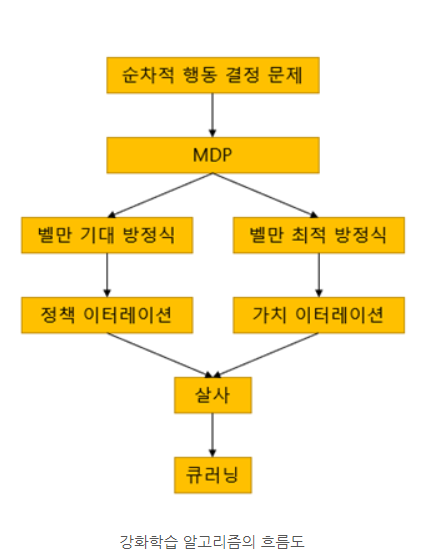

그리드 월드 예제

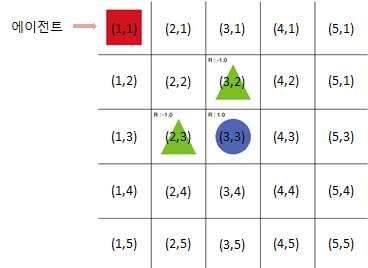

MDP 구성요소
--

**상태**

$ St=s $

- 시간 t에서의 상태

**행동**

$   At=a $

- 시간 t에서의 행동 a

**보상함수**

$ r(s,a) = E[R_{t+1}|S_{t}=s, A_{t}=a] $

- E(Expectation)는 기댓값

- 기댓값은 어떤 정확한 값이 아니라 나오게 될 숫자에 대한 예상임. 상태 s에서 행동 a를 했을 경우에 받을 것이라 예상 되는 숫자

**상태 변환 확률**

$ P^a_{ss}=P[S_{t+1}=s'|S_t=s, A_t=a] $

- P: 확률

- 상태 변환 확률은 상태 s에서 행동 a를 취했을 때, 다른 상태 s'에 도달할 확률

**할인율**

$ \gamma \in [0,1] $

- 할인율의 정의

$ \gamma^{k-1}R_{t+k} $

- $ \gamma^{k-1}$: 미래에 받을 보상이 할인되는 가치
- 더 먼 미래에 받은 보상일수록 현재의 에이전트는 더 작은 값으로 받아들임.
- 할인율을 고려한 미래 보상의 현재 가치
- $k$: 현재로부터 지난 시간

벨만기대방정식
--

$ v_{\pi}(s) = E_{\pi}[R_{t+1}+\gamma v_{\pi}(S_{t+1})|S_t=s] $


> **계산 가능한 벨만 기대방정식**

 $ v_{\pi}(s)= \sum_{a \in A} \pi (a|s) (r_{(s,a)} + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s^{'})) $

벨만 최적 방정식
--

$ v*(s) = max_{a} E[R_{t+1} + \gamma v*(S_{t+1}) | S_{t} = s, A_{t} = a] $


> **벨만 기대 방정식 vs 벨만 최적 방정식**

>> 벨만 기대 방정식

- 벨만 기대 방정식은 특정 정책을 따라갔을 때 가치함수 사이의 관계식 입니다.

>> 벨만 최적 방정식

- 최적의 정책은 최적의 가치함수를 받게 하는 정책이며, 그 때 가치함수 사이의 관계식이 벨만 최적 방정식입니다.

다이내믹 프로그래밍
--

다이내믹 프로그래밍의 기본적인 아이디어는 큰 문제 안에 작은 문제들이 중첩된 경우에 전체 큰 문제를 작은 문제로 쪼개서 풀겠다는 것입니다. 다이내믹 프로그래밍에는 크게 정책 이터레이션(Policy Iteration)과 가치 이터레이션(Value Iteration)이 있습니다.

정책 이터레이션 vs 가치 이터레이션


정책 이터레이션은 벨만 기대 방정식을 이용하여 순차적인 행동 결정 문제를 풀고, 

가치 이터레이션은 벨만 최적 방정식을 이용하여 문제를 풉니다.

#  강화학습 기초 3편

#정책 이터레이션

>정책 평가: 정책 이터레이션에서의 평가

> 정책 발전: 정책 이터레이션에서의 발전

>> 정책 $\rightarrow$ 정책 평가 $\rightarrow$ 정책 발전 $\rightarrow$ 정책 : 이 과정을 무한히 반복하여 최적 정책으로 수렴시킴 

정책 평가 방법
--

> 가치함수를 통해 정책을 평가

$ v_{\pi}(s) = E_{\pi}[R_{t+1}+\gamma \times R_{t+2}+\gamma^2 \times R_{t+3} \cdots |S_t=s] $

- 정책에 대한 평가의 기준이 되는 가치함수

$ v_{\pi}(s) = E_{\pi}[R_{t+1}+\gamma \times v_{\pi}(S_{t+1})|S_t=s] $

- 벨만 기대 방정식을 통한 효율적인 가치함수의 계산

$ v_{\pi}(s) = \sum_{a \in A} \pi (a|s)r_{s,a} + \gamma v_{\pi}(s') $ 

- 합의 형태로 표현한 벨만 기대 방정식

정책 평가 순서
--

1. k번째 가치함수 행렬에서 현재 상태 s에서 다음 상태 s'에 저장되어 있는 가치함수 $v_{\pi}(s')$을 불러옵니다.

2. $v_{\pi}(s')$에 할인율 $\gamma$를 곱하고 그 상태로 가는 행동에 대한 보상 $R_{s}^a$을 더합니다.

$$ r(s,a) + \gamma v_{k}(s') $$

3. 2번에서 구한 값에 그 행동을 할 확률, 즉, 정책 값을 곱합니다.

$$ \pi(a|s)(r_{(s,a)} + \gamma v_{k}(s')) $$

4. 3번을 모든 선택 가능한 행동에 대해 반복하고 그 값들을 더합니다.

$$ \sum_{a \in A}\pi(a|s)(r_{(s,a)} + \gamma v_{k}(s')) $$

5. 4번 과정을 통해 더한 값을  $k+1$번째 가치함수 행렬의 상태 $s$자리에 저장합니다.

6. 1~5번 과정을 모든 $s \in S$에 대해 반복합니다.

정책 발전
--

가치함수를 통해 각 상태에 대해 어떤 행동을 하는 것이 좋은 지 큐함수를 통해 알 수 있음.

> 큐함수

$ q_{\pi} (s,a) = E_{\pi}[R_{t+1} + \gamma q{\pi} (S_{t+1}, A_{t+1}) | S_t=s, A_t = a]  $

>> 계산 가능한 형태로 고친 큐함수

$ q_{\pi}(s,a)=r_{(s,a)} + \gamma v_{\pi} (s') $

정책에 대한 평가를 마쳤다면 정책을 발전시켜야합니다. 정책 발전의 방법이 정해져 있는 것은 아니지만, 탐욕 정책 발전은 가장 널리 알려진 정책 발전 방법중에 하나입니다.

에이전트가 해야할 일은 상태 s에서 선택 가능한 행동의 $q_{\pi} (s,a)$를 비교하고 그중에서 가장 큰 함수를 가지는 행동을 선택하면 됩니다. 이를 탐욕정책 발전이라고 함.

> Q. 왜 이름이 탐욕 정책 발전인가요?

> A. 눈 앞에 보이는 것 중에서 당장에 가장 큰이익을 추구하는 것과 같은 모습 때문에 탐욕 정책 발전이라는 이름이 붙었습니다.

**탐욕 정책 발전으로 얻은 새로운 정책**

$ \pi'(s) = argmax_{a \in A} q_{\pi} (s,a)$


> **정책 이터레이션 코드 참고 자료**

- 소스코드 출처: https://github.com/yunyoseob/reinforcement-learning-kr-v2/blob/master/1-grid-world/1-policy-iteration/policy_iteration.py


#가치 이터레이션

**명시적인 정책과 내재적인 정책**

정책 이터레이션은 명시적인 정책이 있으며, 그 정책을 평가하는 도구로서 가치함수를 사용합니다. 정책의 형태는 여러 가지가 될 수 있으며 가치함수로 평가하는 정책은 이터레이션을 반복할수록 최적에 도달해갑니다.

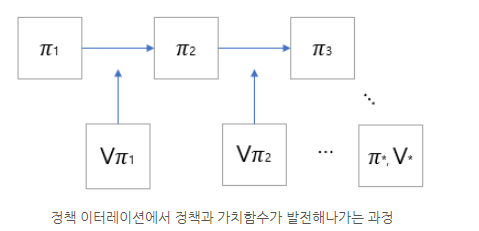

출처: https://blog.naver.com/PostView.nhn?blogId=za_bc&logNo=221549632065


반복적으로 가치함수를 발전시켜, 최적 가치함수에 도달하고 최적 정책을 구하는 것을 가치 이터레이션이라고 한다.

벨만 최적 방정식을 통해 전체 문제를 풀어 나오는 답은 바로 최적 가치 함수입니다. 가치함수를 최적 정책에 대한 가치함수라고 가정하고 반복적으로 계산하면 결국 최적 정책에 대한 참 가치함수 즉, 최적 가치함수를 찾게 되는 것입니다.

> 벨만 최적 방정식을 통해 구하는 최적 가치함수

$$ v*(s) = max_{a} E[R_{t+1} + \gamma v*(S_{t+1}) | S_{t} = s, A_{t}=a ] $$

- 벨만 기대 방정식을 통해 구하는 것은 현재 정책에 대한 참 가치함수이며, 벨만 최적방정식을 통해 구하는 것은 최적 가치함수 이다.

벨만 최적 방정식을 통해 문제를 푸는 가치 이터레이션에서는 따로 정책 발전이 필요 없습니다. 시작부터 최적 정책을 가정했기 때문에, 한 번의 정책 평가 과정을 거치면 최적 가치함수와 최적 정책이 구해지고, 그러면  MDP가 풀리기 때문입니다.

가치 이터레이션은 벨만 기대 방정식과는 다르게 정책값을 이용해 기댓값을 계산하던 부분이 없고 대신 $max$가 있습니다.


> **가치 이터레이션 코드 참고 자료**

- 소스코드 출처: https://github.com/yunyoseob/reinforcement-learning-kr-v2/blob/master/1-grid-world/2-value-iteration/value_iteration.py

# 다이내믹 프로그래밍의 한계

1. 계산복잡도

> 문제의 규모가 점차 늘어난다면 계산만으로 풀어내기에는 한계가 있음.
>> 다이내믹 프로그래밍의 계산 복잡도는 상태 크기의 3제곱에 비례

2. 차원의 저주

> 그리드월드의 상태의 차원은 2차원이였지만, 상태의 차원이 늘어난다면 상태의 수가 지수적으로 증가할 것

3. 환경에 대한 완벽한 정보가 필요

> 다이내믹 프로그래밍을 풀 때 보상과 상태 변환 확률을 정확히 안다는 가정하에 풀었지만, 보통은 이 정보를 정확히 알 수가 없음.



예시로 바둑을 둔다고 했을 때, 다이내믹 프로그래밍의 경우에는 환경에 대한 정확한 지식을 가지고 모든 상태에 대해 동시에 계산을 합니다.

그러나, 바둑의 경우 바둑돌을 놓는 경우의 수가 우주의 원자수보다 많은 10의 170승입니다. 이럴 경우, 계산 복잡도가 기하급수적으로 증가하며 거의 불가능에 가깝다고도 볼 수 있습니다.

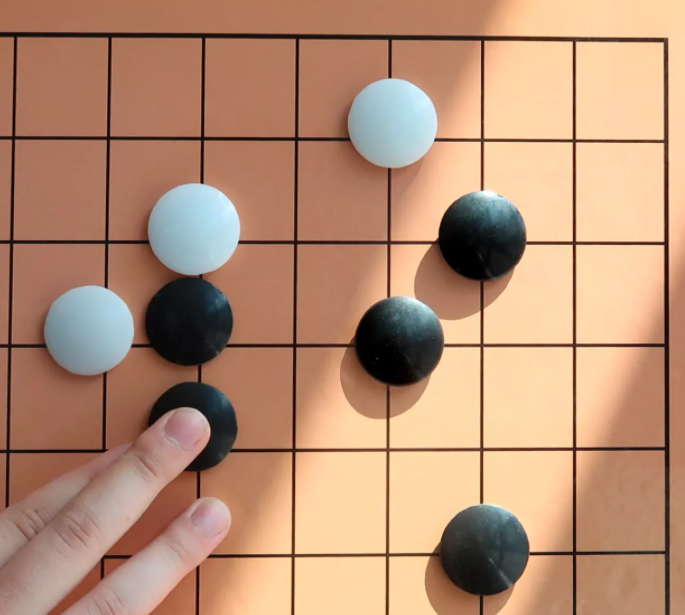

- 사진 출처: https://class101.net/products/z5iOCaElDdkeXtmvEwHn

다이내믹 프로그래밍의 한계를 극복하기 위해서는 근본적으로 문제에 대한 접근 방식이 달라야 합니다. 따라서 환경을 모르지만 환경과의 상호작용을 통해 경험을 바탕으로 학습하는 방법이 등장합니다. 바로 강화학습입니다.

> **사람은 어떻게 바둑을 학습할 수 있었는가??**

사람의 경우 바둑의 룰을 안 이후, 계속해서 학습의 많은 부분을 그냥 바둑을 두면서 학습합니다. 그리고 나서 복기를 하면서 어디서 어떤 잘못을 했고, 어떻게 고쳐야 하는가를 생각합니다.

> **강화학습의 원리**

강화학습 역시, 일단 해보고, 자신을 평가하며, 평가한 대로 자신을 업데이트하는 과정을 반복합니다.

# 강화학습의 등장

>**모델 없이 학습하는 강화학습**


MDP에서 환경의 모델은 상태 변환 확률과 보상

$ 환경의 모델 = P_{ss'}^{a}, r_{(s,a)}$

모델링이란 입력과 출력의 관계를 식으로 나타내는 과정입니다. 그러나 실제 환경에서 원하는 출력값이 나오기는 매우 어렵습니다. (게임에서는 사실 사람이 환경을 만들었고, 사람이 정해준 대로만 게임이 작동하므로 모델링 오차는 없지만 게임을 벗어난다면 환경의 모델을 정확히 알기 어렵습니다.)

모델을 정확히 알기 어려운 경우, 시스템의 입력과 출력 사이의 관계를 알기 위한 두 가지 방법

1. 할 수 있는 선에서 정확한 모델링을 한 다음에 모델링 오차에 대한 부분을 실험을 통해 조정

2. **모델 없이 환경과의 상호작용을 통해 입력과 출력 사이의 관계를 학습(강화학습)**

>**강화학습 vs 다이내믹 프로그래밍**

강화학습: 환경의 모델을 몰라도 환경과의 상호작용을 통해 최적 정책을 학습

다이내믹 프로그래밍: 환경의 모델을 모르면 풀 수가 없음

> **예측, 제어**

에이전트는 환경과의 상호작용을 통해 주어진 정책에 대한 가치함수를 학습할 수 있는데, 이를 예측이라고 합니다.

또한 가치함수를 토대로 정책을 끊임없이 발전시켜 나가서 최적 정책을 학습하려는 것이 제어입니다.

- 예측: 몬테카를로 예측, 시간차 예측

- 제어: 살사(시간차 제어)

#예측

몬테카를로 예측
--

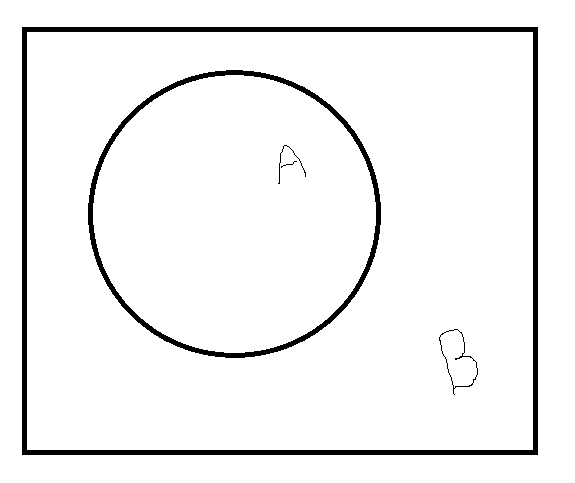

Q. 정사각형 한 변의 길이가 20cm 이고, 원 A의 반지름이 10cm일 때, 정사각형 B의 넓이는?

In [58]:
B=pow(20, 2)

print("B의 넓이는 {}cm^2".format(B))

B의 넓이는 400cm^2


Q. 정사각형 한 변의 길이가 20cm 이고, 원 A의 반지름이 10cm일 때, 원 A의 넓이는?

In [56]:
import numpy as np

A=np.pi*pow(10, 2)
print("원 A의 넓이는 {}cm^2".format(A))

원 A의 넓이는 314.1592653589793cm^2


원의 넓이를 구하는 방정식 $ S = \pi r^2 $

>만약 원의 넓이를 구하는 방정식을 모른다면 원의 넓이는??

- 몬테카를로 근사라는 방법을 사용

몬테카를로 근사
--

**HOW??**

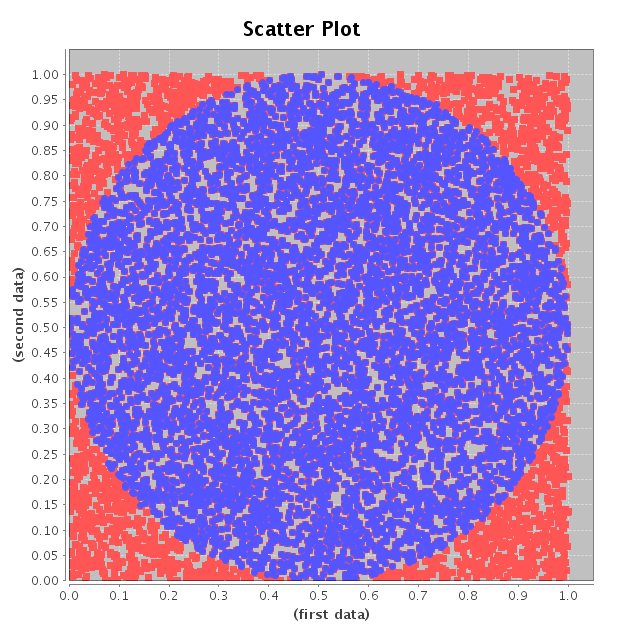

- 사진 출처: https://kim-hjun.medium.com/monte-carlo-method-%EA%B7%B8-%EB%B0%9C%EC%A0%84%EC%9D%98-%EC%97%AD%EC%82%AC-1-5eb5c33fe5fe

원의 그려진 종이 위에 점을 무작위로 계속 뿌린다음, A에 들어가 있는 점(보라색점)의 비율을 구합니다. S(A)를 A의 넓이, S(B)를 B의 넓이라고 했을 때, 이미 S(B)의 넓이를 알고 있으므로, 점의 비율을 구하면 S(A)의 값을 추정할 수 있습니다. 

( $\approx \frac{S(A)}{S(B)}$ )

> 가령, n개의 점을 뿌렸을 때,  if $n \rightarrow \infty $, then

$$ \frac{1}{n}\sum_{i=1}^{n} I(red\_dot_{i} \in A) = \frac{S(A)}{S(B)} $$


- $ I(red\_dot_{i} \in A) $: 점이 원 안에 들어갔을 때, 1을 반환


즉, 쉽게 말하면 두 개중에 나머지 한 도형의 넓이를 모르기 때문에, 점을 무한대로 뿌려서 넓이를 추정하는 것이 몬테카를로 근사라고 할 수 있다.

몬테카를로 예측
--

강화학습에서는 몬테카를로 근사를 사용해 원이 넓이가 아닌 가치함수를 추정합니다.

가치함수를 추정할 때는 에이전트가 한 번 환경에서 에피소드를 진행하는 것이 샘플링입니다. 이 샘플링을 통해 얻은 샘플의 평균으로 참 가치함수의 값을 추정합니다. 이 때 몬테카를로 근사를 사용하는 것을 몬테카를로 예측이라고 합니다.

- 이해하기 쉽게 설명하면 한 에피소드가 원의 넓이 A를 구할 때 점을 한 번 뿌리는 것과 동일함.

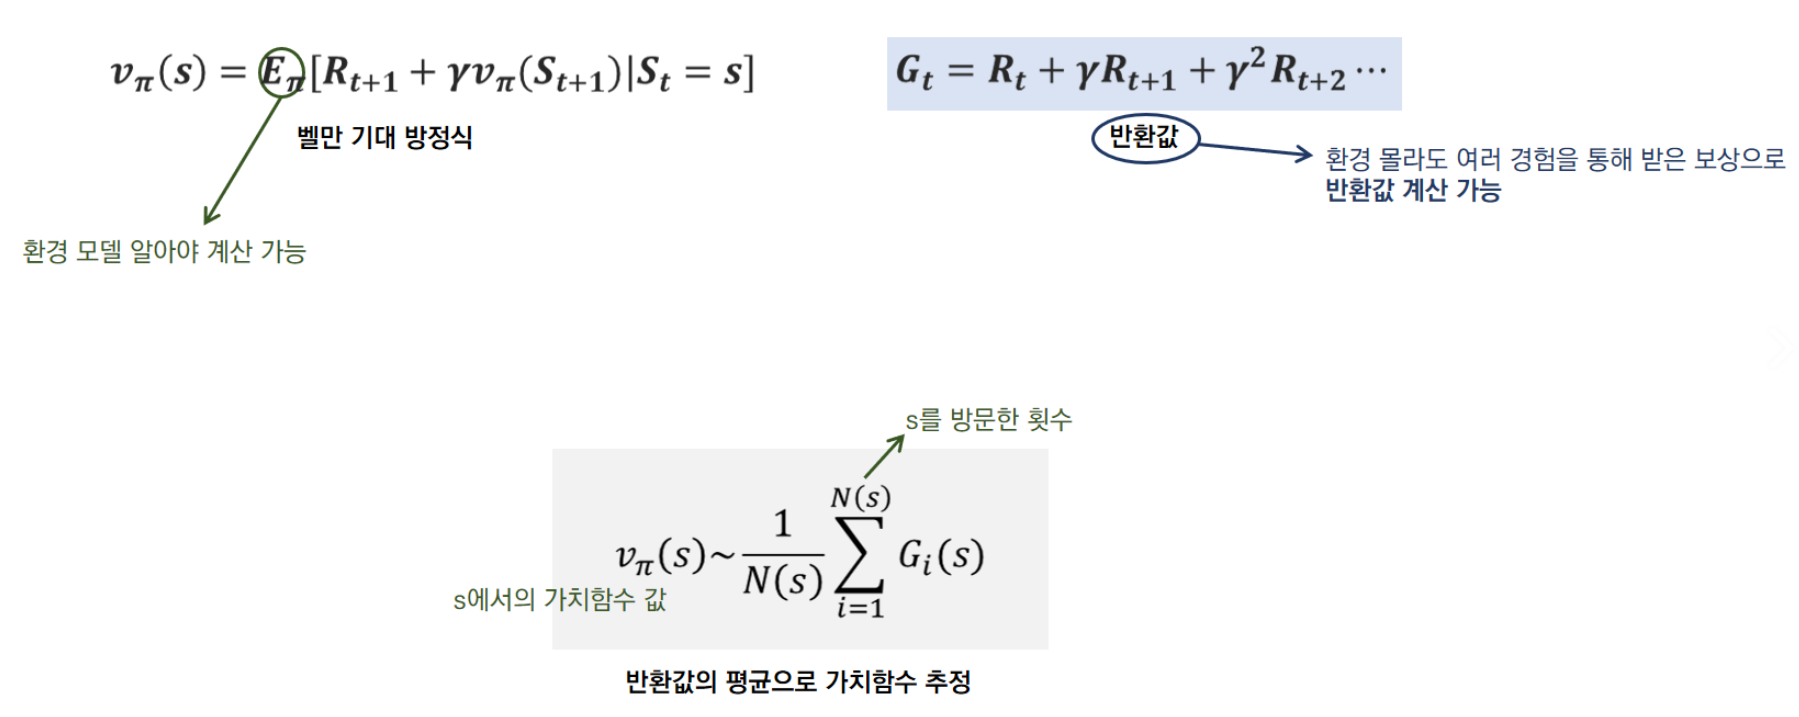

- 사진 출처: https://dana-study-log.tistory.com/entry/%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5-%EC%9D%B4%EB%A1%A0-%EB%AA%AC%ED%85%8C%EC%B9%B4%EB%A5%BC%EB%A1%9C-%EC%98%88%EC%B8%A1-Monte-Carlo-Prediction


가치함수란 현재 상태로부터 받을 보상을 시간별로 할인해서 더한 다음 그것의 기댓값을 계산한 것. 에피소드에 끝이 있다고 가정 했을 때, 그 반환값들의 평균을 통해 참 가치함수의 값을 추정합니다.

> **지내온 상태들의 반환값**

$ G_1= R_{2}+\gamma*R_{3}+\gamma^2*R_{4}+\gamma^3*R_{5}+\gamma^4*R_{6} $

$ G_2 = R_{3}+\gamma*R_{4}+\gamma^2*R_{5}+\gamma^3*R_{6} $

$ G_3= R_{4}+\gamma*R_{5}+\gamma^2*R_{6}$

$ G_4= R_{5}+\gamma*R_{6} $

$ G_5= R_{6} $


 > **벨만 기대 방정식**
 
 $ v(s)=E[R_{t+1}+ \gamma R_{t+2}+ \gamma ^2 R_{t+3} ...| S_{t}=s] $
 
 $ v_{\pi}(s)=E_{\pi}[R_{t+1} + \gamma v_{\pi} (S_{t+1}) | S_{t} = s] $
 
 $ v_{\pi}(s)= \sum_{a \in A} \pi (a|s) (r_(s,a) + \gamma \sum_{s' \in S} P_{ss'}^{a} v_{\pi} (s^{'})) $

> 가치함수 추정

$ v_{\pi}(s) \sim \frac{1}{N(s)} \sum_{i=1}^{N(s)} G_{i}(s) $

> 몬테카를로 예측의 가치함수 업데이트 식

$ V(S_{t}) \leftarrow V(S_{t}) + \alpha (G_{t} - V(S_{t})) $

>>**몬테카를로 예측의 가치함수 업데이트 과정**

$V_{n+1} = \frac{1}{n} \sum_{i=1}^{n} G_{i} = \frac{1}{n} (G_{n} + \sum_{i=1}^{n-1} G_{i}) $

$V_{n+1} = \frac{1}{n} ( G_{n} +(n-1) \frac{1}{n-1} \sum_{i=1}^{n-1} G_{i} $

$V_{n+1} = \frac{1}{n} ( G_{n} +(n-1)V_{n}) $

$\because V_{n} = \frac{1}{n-1} \sum_{i=1}^{n-1} G_{i} $

$V_{n+1} = \frac{1}{n} ( G_{n} + nV_{n} - V_{n}) $

$V_{n+1} = + V_{n}+ \frac{1}{n} ( G_{n}  - V_{n}) $





시간차 예측
--

몬테카를로 예측의 단점은  에피소드에 끝이 있다고 가정 했을 때, 그 반환값들의 평균을 통해 참 가치함수의 값을 추정하기 때문에, 실시간이 아니라는 단점이 있습니다. 또한 에피소드가 끝나지 않거나 길이가 긴 경우 몬테카를로 예측은 적합하지 않습니다.

시간차 예측(Temporal-Difference Prediction)은 몬테카를로 예측과는 다르게 타임스템마다 가치함수를 업데이트 합니다.

> 몬테카를로 예측의 가치함수 업데이트 식

$ V(S_{t}) \leftarrow V(S_{t}) + \alpha (G_{t} - V(S_{t})) $

> 시간차 예측에서의 가치함수 업데이트 식

$ V(S_{t}) \leftarrow V(S_{t}) + \alpha (R_{t+1} - \gamma V(S_{t+1})- V(S_{t})) $

- $R_{t+1} - \gamma V(S_{t+1})- V(S_{t})$: 시간차 에러(Temporal-Difference Error)

시간차 예측에서 업데이트 목표는 반환값(G)과는 달리 실제의 값이 아닙니다.
$V(S_{t+1})$은 에이전트가 가지고 있는 값입니다. 에이전트는 이 값을 $S_{t+1}$의 가치함수 일 것이라고 예측하고 있습니다. 다른 상태의 가치함수 예측값을 통해 지금 상태의 가치함수를 예측하는 이러한 방식을 부트스트랩(Bootstrap)이라고 합니다.

>>**참고**

머신러닝의 앙상블에서 부트스트랩의 개념: 원래의 데이터 셋으로부터 관측치를 반복적으로 추출(복원 반복 추출)하여 데이터 셋을 얻는 방법

시간차 예측은 어떤 상태(S)에서 행동(A)을 하면 보상(R)을 받고, 다음 상태를 알게 되고, 다음상태의 가치함수와 알게 된 보상을 더해 그 값을 업데이트의 목표로 삼는 것입니다. 다음 상태(S)에서 또 다시 행동(A)을 선택하고 이 과정이 반복됩니다.

> 시간차 예측 vs 몬테카를로 예측

- 시간차 예측은 에피소드가 끝날 때까지 기다릴 필요 없이 바로 가치함수를 업데이트 할 수 있음.

- 충분히 많은 샘플링을 통해 업데이트 한다면 몬테카를로 예측보다 더 효율적으로 빠른 시간 안에 참 가치함수에 근접함.

- 그러나 시간차 예측은 몬테카를로 예측보다 초기 가치함수 값에 따라 예측 정확도가 많이 달라지는 단점이 존재

#살사

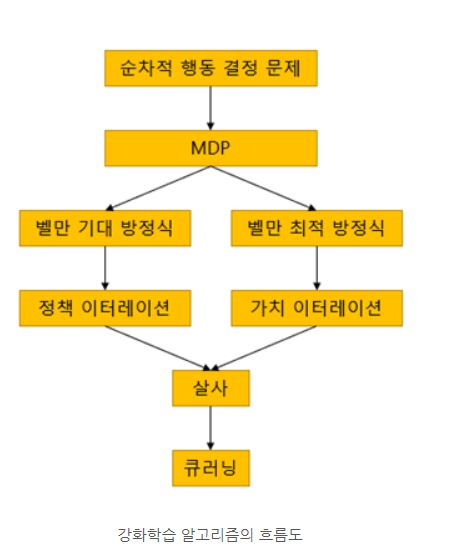

여기서 퀴즈
--

Q. 에이전트는 환경과의 상호작용을 통해 주어진 정책에 대한 가치함수를 학습할 수 있는데, 이를 예측이라고 합니다. 예측에는 몬테카를로 예측과 시간차 예측이 있습니다. 가치함수를 토대로 정책을 끊임없이 발전시켜 나가서 최적 정책을 학습하려는 것을 제어라고 합니다. 제어에는 시간차 제어인 살사가 있습니다. 살사는 영어로 SARSA 입니다. SARSA의 각 글자는 각각의 의미가 담겨있는데요. 각 글자의 의미는 무엇일까요?

(눈치 빠르신 분들은 아마 눈치챘을 겁니다.)

정답
--

S: 상태 A: 행동, R: 보상, S: 상태, A: 행동

$S_{t}$: 샘플인 상태 $A_{t}$: 탐욕 정책에 따른 행동, $R_{t+1}$: 환경이 에이전트에게 주는 보상, $S_{t+1}$: 다음 상태, $A_{t+1}$: 다음 상태에서의 탐욕 정책에 따른 행동 $\rightarrow$ 하나의 샘플 $\rightarrow$ 큐함수를 업데이트

시간차 제어
--

가치 이터레이션에서는 정책 이터레이션에서와 달리 별도의 정책 없이 단지 가치함수에 대해 탐욕적으로 움직입니다. 시간차 방법에서도 마찬가지 입니다.

별도의 정책을 두지 않고 현재 상태에서 가장 큰 가치를 지니는 행동을 선택하는 탐욕정책과 시간차 예측이 합쳐진 것을 시간차 제어라고 합니다.

> 큐함수를 사용한 탐욕 정책

$ \pi (S) = argmax_{a \in A} Q(s,a)$

- 왜 큐함수인데, q가 아니라 Q? : 정확한 값이 아니라 에이전트가 추정하는 값이기 때문

> 시간차 제어에서의 큐함수 업데이트

$ Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) +  \alpha (R_{t+1} - \gamma Q(S_{t+1}, A_{t+1})- Q(S_{t}, A_{t})) $

시간차 제어 과정
--

$$ [S_{t}, A_{t}, R_{t+1}, S_{t+1},  A_{t+1}]   $$ 

$S_{t}$: 샘플인 상태 $A_{t}$: 탐욕 정책에 따른 행동, $R_{t+1}$: 환경이 에이전트에게 주는 보상, $S_{t+1}$: 다음 상태, $A_{t+1}$: 다음 상태에서의 탐욕 정책에 따른 행동 $\rightarrow$ 하나의 샘플 $\rightarrow$ 큐함수를 업데이트

$\rightarrow$ 이것이 시간차 제어의 과정이며, $ [S_{t}, A_{t}, R_{t+1}, S_{t+1},  A_{t+1}]   $ 를 하나의 샘플로 사용하기 때문에 시간차 제어를 다른말로 살사(SARSA)라고 부릅니다. 살사는 현재 가지고 있는 큐함수를 토대로 샘플을 탐욕 정책으로 모으고 그 샘플로 방문한 큐함수를 업데이트하는 과정을 반복하는 것입니다.

$\epsilon$ - 탐욕정책
--

이미 충분히 많은 경험을 한 에이전트의 경우에는 탐욕 정책이 좋은 선택이겠지만, 초기의 에이전트에게 탐욕 정책은 잘못된 학습으로 가게 할 가능성이 큽니다. (큐함수가 잘못된 값에 수렴해서 에이전트가 잘못된 정책을 학습할 수 있음)

이를 방지 하기 위해, 에이전트가 충분히 다양한 경험을 하도록 해야 하는데, 그 대안이 $\epsilon$-탐욕정책입니다. $\epsilon$만큼의 확률로 탐욕적이지 않은 행동을 선택하게 하는 것입니다.

$$ \pi(s) = a^{*} = argmax_{a \in A} Q(s,a), 1- \epsilon의 확률로 or a \neq a^{*}, \epsilon의 확률로 $$

$ 1- \epsilon$인 확률로는 현재 상태에서 가장 큰 큐함수의 값을 가지는 행동 선택(탐욕 정책) + 일정한 $\epsilon$의 확률로 엉뚱한 행동

살사는 간단하게

> 1. $\epsilon$-탐욕 정책을 통해 $[S_{t}, A_{t}, R_{t+1}, S_{t+1},  A_{t+1}]$을 획득

> 2. 획득한 샘플로 큐함수 $Q(S_{t}, A_{t})$를 업데이트


$ Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) +  \alpha (R_{t+1} - \gamma Q(S_{t+1}, A_{t+1})- Q(S_{t}, A_{t})) $

#큐러닝

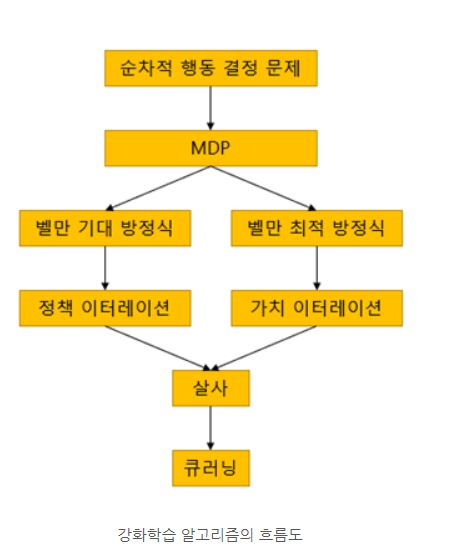

**살사의 한계**

탐험을 위해 선택한 $\epsilon$-탐욕정책으로 인해 에이전트가 오히려 최적 정책을 학습하지 못하고 잘못된 정책을 학습

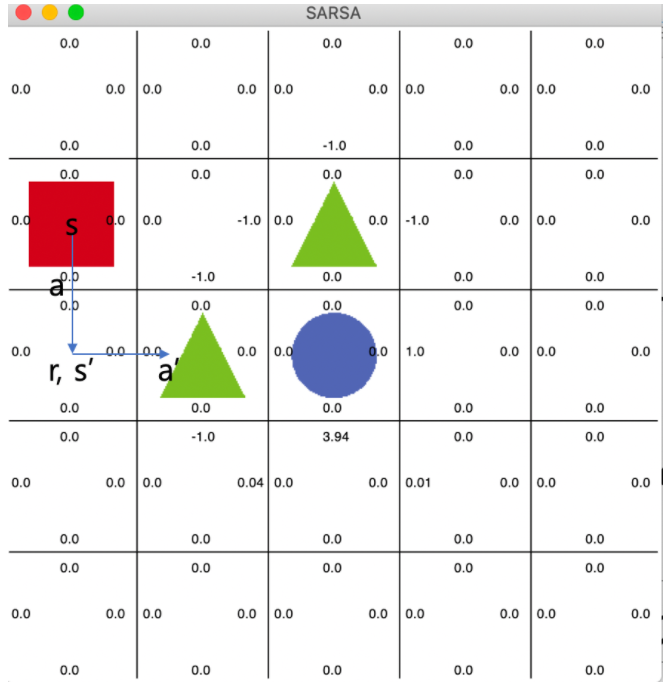

1. 초기 에이전트가 만약 s에서 a라는 행동을 하고 다음 행동인 a’은 탐험을 통해서 가게 되었다고 생각해보자.

2. 그럼 자연스럽게 초기 에이전트는 Q(s,a) 값을 낮출 것이고 이에 따라 s에서 아래로 이동하는 행동이 안좋다고 판단할 것이다.

3. 결국 에이전트가 특정 state에 갇혀버리는 현상이 발생한다.

4. 이렇게 자신이 행동한 대로 학습하는 것을 On-Policy 시간차 제어라고 한다.

5. 이러한 딜레마를 해결하기 위해 사용하는 것이 바로 오프폴리시 시간차 제어, 큐러닝이다.

- 출처: https://zoomkoding.github.io/%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5/2019/07/23/RL-3.html

- 사진 출처: https://zoomkoding.github.io/%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5/2019/07/23/RL-3.html



오프폴리시는 말 그대로 현재 행동하는 정책과는 독립적으로 학습한다는 것입니다. 즉, 행동하는 정책과 학습하는 정책을 따로 분립합니다.

에이전트는 행동하는 정책으로 지속적인 탐험을 하는데, 행동하는 것과는 별개로 에이전트는 따로 목표 정책을 둬서 학습은 목표 정책에 따라서 합니다.

- (살사는 단지 현재 큐함수에 따라 행동을 선택하는 것이 정책)

큐러닝 학습 방법

1. 현재 상태 s에서 행동 a를 $\epsilon$-탐욕 정책에 따라 선택

2. 에이전트는 환경으로부터 보상 r을 받고 다음 상태 s'을 받음.

3. 살사는 다음 상태 s'에서 또 다시 $\epsilon$-탐욕 정책에 따라 다음 행동을 선택한 뒤에 샘플로 사용하지만, 이와 달리 큐러닝은 다음 상태 s'를 일단 알게 되면 그 상태에서 가장 큰 큐함수를 현재 큐함수의 업데이트에 사용 


$ Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) +  \alpha (R_{t+1} - \gamma Q(S_{t+1}, a')- Q(S_{t}, A_{t})) $

살사 vs 큐러닝
--

살사: 큐함수를 업데이트하기 위해 벨만 기대 방정식을 사용

큐러닝: 큐함수를 업데이트 하기 위해 벨만 최적 방정식을 사용

큐러닝을 통해 학습하면 살사에서와 같이 다음 상태 s'에서 실제 선택한 행동의 정보가 현재 상태 s의 큐함수를 업데이트 할 때 포함하지 않음

> 살사 vs 큐러닝 큐함수 업데이트

>>살사


$$ Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) +  \alpha (R_{t+1} - \gamma Q(S_{t+1}, A_{t+1})- Q(S_{t}, A_{t})) $$

>> 큐러닝

$$  Q(S_{t}, A_{t}) \leftarrow Q(S_{t}, A_{t}) +  \alpha (R_{t+1} - \gamma Q(S_{t+1}, a')- Q(S_{t}, A_{t})) $$

